In [7]:
from math import inf as infinity
import random
import copy
DYNAMIC = 2
MINIMAX = 1
import numpy as np
state_values = {}
policy = {}
dynamic_score = 0
opponent_score = 0

size = int(input('Size of the board '))
n = int(input('How many pieces in a row are needed to win? '))
number_of_games = int(input('Number of matches '))

board = [[0 for _ in range(size)] for _ in range(size)]

def game_over(state):
    return wins(state, DYNAMIC) or wins(state, MINIMAX)


def empty_cells(state): 
    empty = []
    for x, row in enumerate(state):
        for y, col in enumerate(row):
            if col == 0:
                empty.append([x,y])     
    return empty
            
def valid_move(x,y):
    global board
    if board[x][y] == 0:
        return True
    return False

def set_move(x,y,player):
    if valid_move(x,y):
        board[x][y] = player
        return True
    return False

def wins(state, player):
  # Check row
  for row in state:
    for i in range(len(row) - n + 1):
      if all(row[i + k] == player for k in range(n)):
        return True

  # Check col
  for i in range(len(state)):
    for j in range(len(state) - n + 1):
      if all(state[j + k][i] == player for k in range(n)):
        return True

  # Check diagonal (top-left to bottom-right)
  for i in range(len(state) - n + 1):
    for j in range(len(state[0]) - n + 1):
      if all(state[i + k][j + k] == player for k in range(n)):
        return True

  # Check diagonal (top-right to bottom-left)
  for i in range(len(state) - n + 1):
    for j in range(n - 1, len(state[0])):
      if all(state[i + k][j - k] == player for k in range(n)):
        return True

  return False

def check_n(state, player):
  score = 0
  # Check row
  for row in state:
    for i in range(len(row) - n + 1):
      if all(row[i + k] == player for k in range(n)):
        score += 10 * n  # Điều chỉnh điểm tùy vào n

  # Check col
  for i in range(len(state)):
    for j in range(len(state) - n + 1):
      if all(state[j + k][i] == player for k in range(n)):
        score += 10 * n  # Điều chỉnh điểm tùy vào n

  # Check diagonal (top-left to bottom-right)
  for i in range(len(state) - n + 1):
    for j in range(len(state[0]) - n + 1):
      if all(state[i + k][j + k] == player for k in range(n)):
        score += 10 * n  # Điều chỉnh điểm tùy vào n

  # Check diagonal (top-right to bottom-left)
  for i in range(len(state) - n + 1):
    for j in range(n - 1, len(state[0])):
      if all(state[i + k][j - k] == player for k in range(n)):
        score += 10 * n  # Điều chỉnh điểm tùy vào n

  return score

def find_open_n(state, player):
    # Check row
    for row in state:
        for i in range(len(row) - n + 1):
            if all(row[i + k] == player for k in range(n)):
                if (i - 1 >= 0 and row[i - 1] == 0) and (i + n < len(row) and row[i + n] == 0):
                    return True

    # Check col
    for i in range(len(state)):
        for j in range(len(state) - n + 1):
            if all(state[j + k][i] == player for k in range(n)):
                if (j - 1 >= 0 and state[j - 1][i] == 0) and (j + n < len(state) and state[j + n][i] == 0):
                    return True

    # Check diagonal (top-left to bottom-right)
    for i in range(len(state) - n + 1):
        for j in range(len(state[0]) - n + 1):
            if all(state[i + k][j + k] == player for k in range(n)):
                if (i - 1 >= 0 and j - 1 >= 0 and state[i - 1][j - 1] == 0) and (i + n < len(state) and j + n < len(state[0]) and state[i + n][j + n] == 0):
                    return True

    # Check diagonal (top-right to bottom-left)
    for i in range(len(state) - n + 1):
        for j in range(n - 1, len(state[0])):
            if all(state[i + k][j - k] == player for k in range(n)):
                if (i - 1 >= 0 and j + 1 < len(state[0]) and state[i - 1][j + 1] == 0) and (i + n < len(state) and j - n >= 0 and state[i + n][j - n] == 0):
                    return True

    return False

def check_3(state, player):
    score = 0
    # Check row
    for row in state:
        for i in range(len(row) - 2):
            if all(row[i + k] == player for k in range(3)):
                score += 45

    # Check col
    for i in range(len(state)):
        for j in range(len(state) - 2):
            if all(state[j + k][i] == player for k in range(3)):
                score += 45

    # Check diagonal (top-left to bottom-right)
    for i in range(len(state) - 2):
        for j in range(len(state[0]) - 2):
            if all(state[i + k][j + k] == player for k in range(3)):
                score += 45

    # Check diagonal (top-right to bottom-left)
    for i in range(len(state) - 2):
        for j in range(2, len(state[0])):
            if all(state[i + k][j - k] == player for k in range(3)):
                score += 45

    return score

def check_2(state, player):
    score = 0
    # Check row
    for row in state:
        for i in range(len(row) - 1):
            if all(row[i + k] == player for k in range(2)):
                score += 20

    # Check col
    for i in range(len(state)):
        for j in range(len(state) - 1):
            if all(state[j + k][i] == player for k in range(2)):
                score += 20

    # Check diagonal (top-left to bottom-right)
    for i in range(len(state) - 1):
        for j in range(len(state[0]) - 1):
            if all(state[i + k][j + k] == player for k in range(2)):
                score += 20

    # Check diagonal (top-right to bottom-left)
    for i in range(len(state) - 1):
        for j in range(1, len(state[0])):
            if all(state[i + k][j - k] == player for k in range(2)):
                score += 20

    return score

def def_3(state, player, opponent):
    score = 0
    # Check row
    for row in state:
        for i in range(len(row) - 2):
            if all(row[i + k] == player for k in range(3)):
                # Check bounds for left and right blocking
                left_blocked = i > 0 and row[i - 1] == opponent
                right_blocked = i + 3 < len(row) and row[i + 3] == opponent
                if left_blocked or right_blocked:
                    score += 60

    # Check col
    for i in range(len(state)):
        for j in range(len(state) - 2):
            if all(state[j + k][i] == player for k in range(3)):
                # Check bounds for top and bottom blocking
                top_blocked = j > 0 and state[j - 1][i] == opponent
                bottom_blocked = j + 3 < len(state) and state[j + 3][i] == opponent
                if top_blocked or bottom_blocked:
                    score += 60

    # Check diagonal (top-left to bottom-right)
    for i in range(len(state) - 2):
        for j in range(len(state[0]) - 2):
            if all(state[i + k][j + k] == player for k in range(3)):
                # Check bounds for top-left and bottom-right blocking
                top_left_blocked = i > 0 and j > 0 and state[i - 1][j - 1] == opponent
                bottom_right_blocked = i + 3 < len(state) and j + 3 < len(state[0]) and state[i + 3][j + 3] == opponent
                if top_left_blocked or bottom_right_blocked:
                    score += 60

    # Check diagonal (top-right to bottom-left)
    for i in range(len(state) - 2):
        for j in range(2, len(state[0])):
            if all(state[i + k][j - k] == player for k in range(3)):
                # Check bounds for top-right and bottom-left blocking
                top_right_blocked = i > 0 and j + 1 < len(state[0]) and state[i - 1][j + 1] == opponent
                bottom_left_blocked = i + 3 < len(state) and j - 3 >= 0 and state[i + 3][j - 3] == opponent
                if top_right_blocked or bottom_left_blocked:
                    score += 60

    return score

def def_2(state, player, opponent):
    score = 0
    # Check row
    for row in state:
        for i in range(len(row) - 1):
            if all(row[i + k] == player for k in range(2)):
                # Check bounds for left and right blocking
                left_blocked = i > 0 and row[i - 1] == opponent
                right_blocked = i + 2 < len(row) and row[i + 2] == opponent
                if left_blocked or right_blocked:
                    score += 40

    # Check col
    for i in range(len(state)):
        for j in range(len(state) - 1):
            if all(state[j + k][i] == player for k in range(2)):
                # Check bounds for top and bottom blocking
                top_blocked = j > 0 and state[j - 1][i] == opponent
                bottom_blocked = j + 2 < len(state) and state[j + 2][i] == opponent
                if top_blocked or bottom_blocked:
                    score += 40

    # Check diagonal (top-left to bottom-right)
    for i in range(len(state) - 1):
        for j in range(len(state[0]) - 1):
            if all(state[i + k][j + k] == player for k in range(2)):
                # Check bounds for top-left and bottom-right blocking
                top_left_blocked = i > 0 and j > 0 and state[i - 1][j - 1] == opponent
                bottom_right_blocked = i + 2 < len(state) and j + 2 < len(state[0]) and state[i + 2][j + 2] == opponent
                if top_left_blocked or bottom_right_blocked:
                    score += 40

    # Check diagonal (top-right to bottom-left)
    for i in range(len(state) - 1):
        for j in range(1, len(state[0])):
            if all(state[i + k][j - k] == player for k in range(2)):
                # Check bounds for top-right and bottom-left blocking
                top_right_blocked = i > 0 and j + 1 < len(state[0]) and state[i - 1][j + 1] == opponent
                bottom_left_blocked = i + 2 < len(state) and j - 2 >= 0 and state[i + 2][j - 2] == opponent
                if top_right_blocked or bottom_left_blocked:
                    score += 40

    return score

def find_open_three(state, player):
    score = 0
    # Check row
    for row in state:
        for i in range(len(row) - 2):
            if all(row[i + k] == player for k in range(3)):
                if (i-1 >= 0 and row[i-1] == 0) and (i+3 < len(row) and row[i+3] == 0):
                    score += 300  # Cộng điểm cho "open three"

    # Check col
    for i in range(len(state)):
        for j in range(len(state) - 2):
            if all(state[j + k][i] == player for k in range(3)):
                if (j-1 >= 0 and state[j-1][i] == 0) and (j+3 < len(state) and state[j+3][i] == 0):
                    score += 300  # Cộng điểm cho "open three"

    # Check diagonal (top-left to bottom-right)
    for i in range(len(state) - 2):
        for j in range(len(state[0]) - 2):
            if all(state[i + k][j + k] == player for k in range(3)):
                if (i-1 >= 0 and j-1 >= 0 and state[i-1][j-1] == 0) and (i+3 < len(state) and j+3 < len(state[0]) and state[i+3][j+3] == 0):
                    score += 300  # Cộng điểm cho "open three"

    # Check diagonal (top-right to bottom-left)
    for i in range(len(state) - 2):
        for j in range(2, len(state[0])):
            if all(state[i + k][j - k] == player for k in range(3)):
                if (i-1 >= 0 and j+1 < len(state[0]) and state[i-1][j+1] == 0) and (i+3 < len(state) and j-3 >= 0 and state[i+3][j-3] == 0):
                    score += 300  # Cộng điểm cho "open three"
    
    return score


def random_move(state):
    actions = empty_cells(state)
    return random.choice(actions)

def evaluate_dynamic(state):
    score = 0
    if wins(state,DYNAMIC):
        score += 2000
    if wins(state, MINIMAX):
        score -= 1500
    if find_open_n(state, DYNAMIC):
        score += 800
    if find_open_n(state,MINIMAX):
        score -= 600
    n_score = check_n(state, DYNAMIC)
    score += n_score
    connect_2 = check_2(state, DYNAMIC)
    score += connect_2
    connect_3 = check_3(state, DYNAMIC)
    score += connect_3
    connect_2 = check_2(state, MINIMAX)
    score -= connect_2 
    connect_3 = check_3(state, MINIMAX)
    score -= connect_3 
    defend = def_3(state, MINIMAX, DYNAMIC)
    score += defend
    defend = def_2(state, MINIMAX, DYNAMIC)
    score += defend
    open_three = find_open_three(state, DYNAMIC)
    score += open_three
    return score
        
def render(state,c_choice, h_choice):
    choices = {
        1 : h_choice,
        2 : c_choice,
        0: ' '
    }
    line = '---------------------------------------------'
    print(line)
    for row in state:
        for col in row:
            symbol = choices[col]
            print('|',symbol,'|',end='')
        print()
        print(line)
        
def encode_state(state):
    return tuple(tuple(row) for row in state)

def copy_board(state):
    return copy.deepcopy(state)

def value_iteration_extra(state):
    board_cp = copy_board(state)
    
    best_action = None
    best_value = -infinity

    actions = empty_cells(board_cp)
    for action in actions:
        x, y = action[0], action[1]
        board_cp[x][y] = DYNAMIC
        value = evaluate_dynamic(board_cp)
        if value > best_value:
            best_action = action
            best_value = value
        board_cp[x][y] = 0
        
    return best_action

def save_state(state):
    key = encode_state(state)
    state_values[key] = 0

def game_with_random(func, c_choice, h_choice):
    respectively = True
    while not game_over(board) and len(empty_cells(board)) > 0:
        if respectively:
            move = func(board)
            x, y = move[0], move[1]
            set_move(x, y, MINIMAX)
            save_state(board)
        else:
            move = func(board)
            x, y = move[0], move[1]
            set_move(x, y, DYNAMIC)
        # render(board, c_choice, h_choice)
        respectively = not respectively
    reset()
        
def check_winner(state):
    global dynamic_score, opponent_score
    if wins(state, DYNAMIC):
        print("DYNAMIC WINS")
        dynamic_score += 1
    elif wins(state, MINIMAX):
        print("DYNAMIC'S OPPONENT WINS")
        opponent_score += 1
    else:
        print("IT'S A DRAW")
    return

def reset():
    global board
    board = [[0 for _ in range(size)] for _ in range(size)]
    
def state_copy(state):
    return [list(row) for row in state]

def correct_state(state):
    count_1 = 0
    count_2 = 0

    for row in state:
        count_1 += row.count(1)
        count_2 += row.count(2)

    return count_1 != count_2
    
def actual_value_iteration(theta = 1e-6, gamma = 0.99):
    delta = infinity
    while delta > theta:
        delta = 0
        for state in state_values.keys():
            if not correct_state(state):
                move = random_move(state)
                x, y = move[0], move[1]
                set_move(x, y, MINIMAX)
                state_values[state] = evaluate_dynamic(state)
                continue
            old_value = state_values[state]
            best_action = None
            max_qsa = -infinity
            
            actions = empty_cells(state)
            board_cp = state_copy(state)
            if not actions:
                continue
            
            for action in actions:
                x, y = action[0], action[1]
                board_cp[x][y] = DYNAMIC
                next_state = encode_state(board_cp)
                qsa = evaluate_dynamic(board_cp) + gamma * state_values.get(next_state, 0)
                if qsa > max_qsa:
                    best_action = action
                    max_qsa = qsa
                board_cp[x][y] = 0
                
            state_values[state] = max_qsa
            policy[state] = best_action
            delta = max(delta, abs(old_value - max_qsa))

def game_with_dynamic(func, c_choice, h_choice):
    respectively = True
    while not game_over(board) and len(empty_cells(board)) > 0:
        if respectively:
            move = func(board)
            x, y = move[0], move[1]
            set_move(x, y, MINIMAX)
        else:
            key = encode_state(board)
            if key in policy:
                move = policy[key]
            else:
                move = value_iteration_extra(board)
            x, y = move[0], move[1]
            set_move(x, y, DYNAMIC)
        # render(board, c_choice, h_choice)
        respectively = not respectively
    check_winner(board)
    reset()
            
def main():
    global board
    h_choice = 'X'  
    c_choice = 'O' 
    # generate state by random moves from both side 
    for i in range(number_of_games):
        game_with_random(random_move, c_choice, h_choice)
    # value iteration
    actual_value_iteration()
    # games after value iteration
    for i in range(number_of_games):
        game_with_dynamic(random_move, c_choice, h_choice)
    print(f'final score: dynamic: {dynamic_score} - opponent: {opponent_score}')
if __name__ == '__main__':
    main()

DYNAMIC'S OPPONENT WINS
DYNAMIC WINS
DYNAMIC WINS
IT'S A DRAW
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
IT'S A DRAW
IT'S A DRAW
IT'S A DRAW
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
IT'S A DRAW
DYNAMIC WINS
DYNAMIC WINS
IT'S A DRAW
DYNAMIC'S OPPONENT WINS
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
IT'S A DRAW
IT'S A DRAW
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
IT'S A DRAW
DYNAMIC WINS
IT'S A DRAW
IT'S A DRAW
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
IT'S A DRAW
DYNAMIC WINS
IT'S A DRAW
DYNAMIC WINS
IT'S A DRAW
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC'S OPPONENT WINS
DYNAMIC WINS
DYNAMIC'S OPPONENT WINS
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
IT'S A DRAW
DYNAMIC'S OPPONENT WINS
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
DYNAMIC WINS
IT'S A DRAW
DYNAMIC WINS
IT'S A DRAW
DYNAMIC'S OPPONENT WINS
DYNAMIC WINS
IT'S A DRAW
IT'S A DRAW
IT'S A DRAW
DYNAMIC WINS
DYNAM

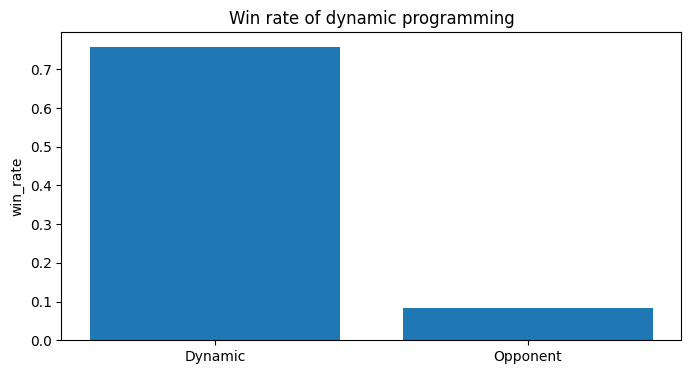

In [8]:
import matplotlib.pyplot as plt
dynamic_win_rate = dynamic_score / number_of_games
opponent_win_rate = opponent_score / number_of_games

y = np.array([dynamic_win_rate, opponent_win_rate])
x = np.array(['Dynamic', 'Opponent'])

fig, ax = plt.subplots(figsize = (8,4))
ax.bar(x, y)
ax.set_ylabel('win_rate')
ax.set_title('Win rate of dynamic programming')
plt.show()